![challenge header](https://raw.githubusercontent.com/robynfsj/cfg-big-data-challenge/master/images/header.jpg?token=ANPGOVNWGP52LH4EC2QDSYK7NOQV2)

## Team M
Laura Ramoskaite  
Dimitra Charalampopoulou    
Güzide Sofi  
Robyn Seymour-Jones  
  
***

# The effects of COVID-19 lockdown measures on the supply and demand of electricity in the UK

## 1. Introduction

<-- Intro paragraph 1: explain briefly what has happened in terms on COVID-19 and lockdown. Mention it was global but move specific into what happened in the UK (e.g. give date when people were told to stay at home, could mention number of deaths as of today etc.). -->

<-- Intro paragraph 2: explain why it is important to do this this challenge. Mention climate change facts (with references if possible) and the need to ensure a sustainable recovery from COVID-19 lockdown. -->

<-- Intro paragraph 3: explain why we are looking at electricity data in particular. Give some facts with references about CO2 emissions from UK electricity generation. -->

### Aims  
We have established the following aims that we want acheive:  
  
1. Find out what has been the impact of COVID-19 on the supply and demand of electricity in the UK.  
2. Find out what would have happened to the supply and demand of UK electricity if COVID-19 had not happened.  
  
### Objectives  
In order to acheive our aims, we will complete the following objectives:  
  
1. Plot historical data of total electricity sold in the UK as an indicator of demand.  
2. Plot 2020 electricity sold against stringency to show impact of COVID on demand.  
3. Plot 2020 average rolling demand to show high resolution impact of COVID lockdown measures on demand.  
4. Model total electricity sold data to see what the demand would have been without COVID.  

<-- NOTE: If we have time we could do objectives 1 - 3 split in terms of renewable, non-renewable. -->

### Structure of this report
Section 2 – describes the methods we have employed and imports the modules and libraries required.  
Section 3 – imports and checks the data as well as some data wrangling such as converting to datetime.  
Section 4 – explores historical electricity supply and demand in the UK during the years prior to 2020.  
Section 5 – explores the impact of COVID-19 lockdown measures on electricity demand.  
Section 6 – models what might have happened to electricity demand in 2020 if COVID-19 hadn't happened.

## 2. Methods
  
### 2.1 Libraries and modules
The following libraries and modules are required:

In [167]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter 

<-- Paragraph about the model we are using including a reference -->

### 2.2 Data collection and choices
  
#### 2.1.1 Stringency data  
  
#### 2.2.2 Electricity data  
Electricity supply is the total amount of electricity that is available while electricity demand is the total amount of electricity that end users consume. They tend to be very similar as electricity generation aims to produce only enough electricity to meet the demand. Although electricity demand is more useful in seeing how COVID-19 has affected behaviour and business in the UK, it is import to also look at supply as these data are "*generally considered to be more accurate than demand data*" (BEIS, 2010).  
  
##### Electricity supply
To investigate electricity supply in the UK we used table 5.4 of *Energy Trends: UK Energy* (BEIS, 2020). This provides us with data on the amount of electricity available in the UK public supply system. It includes electricity supplied by the major power producers, electricity supplied by other smaller generators and net trade in electricity (BEIS, 2010).  
  
##### Electricity demand
To investigate electricity demand in the UK we used table ...  
Total electricity sold (TWh) is used as a proxy for electricity demand.

## 3. Data import and checks
  
### 3.1 Electricity supply
  
#### Total electricity available (by month)

In [24]:
# Read in data.
elec_avail = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='5.2')

# Create datetime column.
elec_avail['date'] = pd.to_datetime(elec_avail['year'].astype(str) + 
                                    elec_avail['month'].astype(str),
                                    format='%Y%B')

# Check data.
elec_avail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   year                   306 non-null    int64         
 1   month                  306 non-null    object        
 2   electricity_available  306 non-null    float64       
 3   date                   306 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [25]:
elec_avail.head()

,year,month,electricity_available,date
0,1995,January,28.50,1995-01-01
1,1995,February,27.88,1995-02-01
2,1995,March,33.33,1995-03-01
3,1995,April,23.88,1995-04-01
4,1995,May,22.61,1995-05-01


### 3.2 Electricity supply by fuel type

In [343]:
elec_avail_type = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='9.2')

# Create a datetime column so it is easy to plot against time.
elec_avail_type['date'] = elec_avail_type['year'].astype(str) + elec_avail_type['month'].astype(str)
elec_avail_type['date'] = pd.to_datetime(elec_avail_type['date'],
                                         format='%Y%B')

# Transform from wide format to long format.
elec_avail_type = pd.melt(elec_avail_type,
                          id_vars=['date'],
                          value_vars=['coal', 
                                      'oil', 
                                      'gas', 
                                      'nuclear', 
                                      'hydro', 
                                      'wind',
                                      'solar',
                                      'bioenergy',
                                      'other'],
                          var_name='fuel_type',
                          value_name='electricity_available')

elec_avail_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2538 entries, 0 to 2537
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   2538 non-null   datetime64[ns]
 1   fuel_type              2538 non-null   object        
 2   electricity_available  2538 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 59.6+ KB


In [344]:
elec_avail_type.head()

,date,fuel_type,electricity_available
0,1997-01-01,coal,12.194
1,1997-02-01,coal,10.306
2,1997-03-01,coal,11.289
3,1997-04-01,coal,7.216
4,1997-05-01,coal,6.231


### 3.3 Electricity supply by fuel type (renewable vs non-renewable)

In [347]:
elec_avail_renew = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='8.2')

# Create a datetime column so it is easy to plot against time.
elec_avail_renew['date'] = elec_avail_renew['year'].astype(str) + elec_avail_renew['month'].astype(str)
elec_avail_renew['date'] = pd.to_datetime(elec_avail_type['date'],
                                         format='%Y%B')

# Transform from wide format to long format.
elec_avail_renew = pd.melt(elec_avail_renew,
                           id_vars=['date'],
                           value_vars=['non-renewable', 
                                      'renewable'],
                           var_name='fuel_type',
                           value_name='electricity_available')

elec_avail_renew.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   564 non-null    datetime64[ns]
 1   fuel_type              564 non-null    object        
 2   electricity_available  564 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 13.3+ KB


In [348]:
elec_avail_renew.head()

,date,fuel_type,electricity_available
0,1997-01-01,non-renewable,28.064493
1,1997-02-01,non-renewable,26.667702
2,1997-03-01,non-renewable,30.309155
3,1997-04-01,non-renewable,22.200902
4,1997-05-01,non-renewable,21.552039


### 3.4 Electricity demand

In [199]:
# Read in data.
elec_sold = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='6.2')

# Create a datetime column so it is easy to plot against time.
elec_sold['date'] = elec_sold['year'].astype(str) + elec_sold['month'].astype(str)
elec_sold['date'] = pd.to_datetime(elec_sold['date'],
                                       format='%Y%B')

# Check data.
elec_sold.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   year                    306 non-null    int64         
 1   month                   306 non-null    object        
 2   electricity_sold_total  306 non-null    float64       
 3   date                    306 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 9.7+ KB


In [200]:
elec_sold.head()

,year,month,electricity_sold_total,date
0,1995,January,25.64,1995-01-01
1,1995,February,25.19,1995-02-01
2,1995,March,30.12,1995-03-01
3,1995,April,21.60,1995-04-01
4,1995,May,20.52,1995-05-01


## 4. Historical UK electricity supply and demand prior to COVID-19

<-- We could have three plots here:
  
plot 1 – monthly electricity sold for the past 5 years  
plot 2 – plot of electricity production by power station type (e.g. gas, coal, wind, solar)  
plot 3 – plot of electricity production by renewable and non-renewable (or by fossil fuel and non fossil fuel) --> 

### 4.1 Historic electricity supply

In [269]:
# Recap dateframe headings.
variable_names = elec_avail.columns

for row in variable_names:
    print(row)

year
month
electricity_available
date


#### All available data

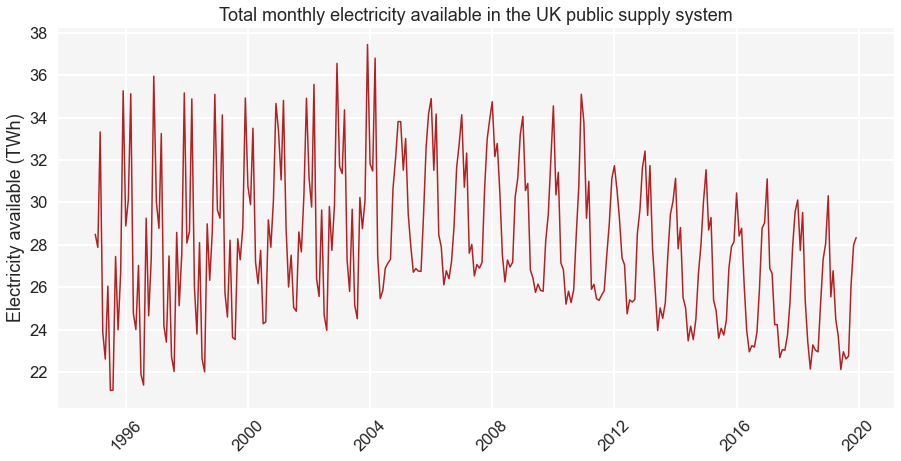

In [265]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total monthly electricity available '
                                            'in the UK public supply system');

<-- Paragraph describing the plot -->  
  
#### Last 10 years

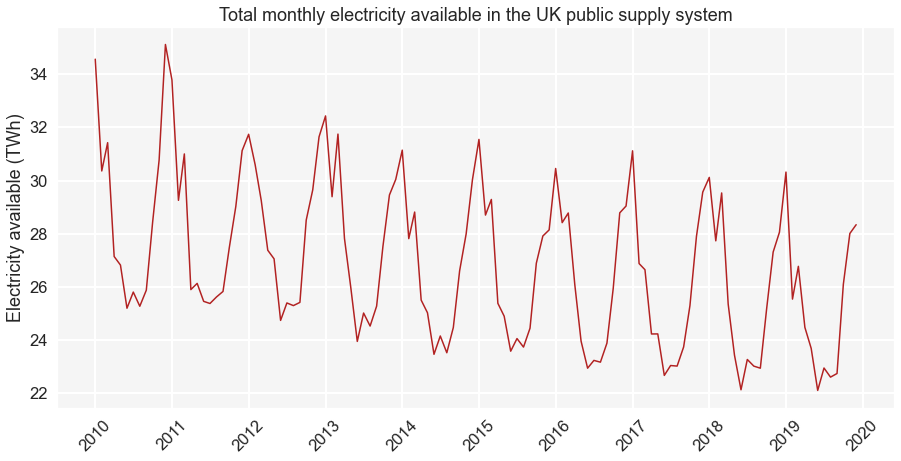

In [252]:
# Select data to plot.
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total monthly electricity available in the UK public supply system');

<-- Paragraph explaining plot -->  
  
#### Last year

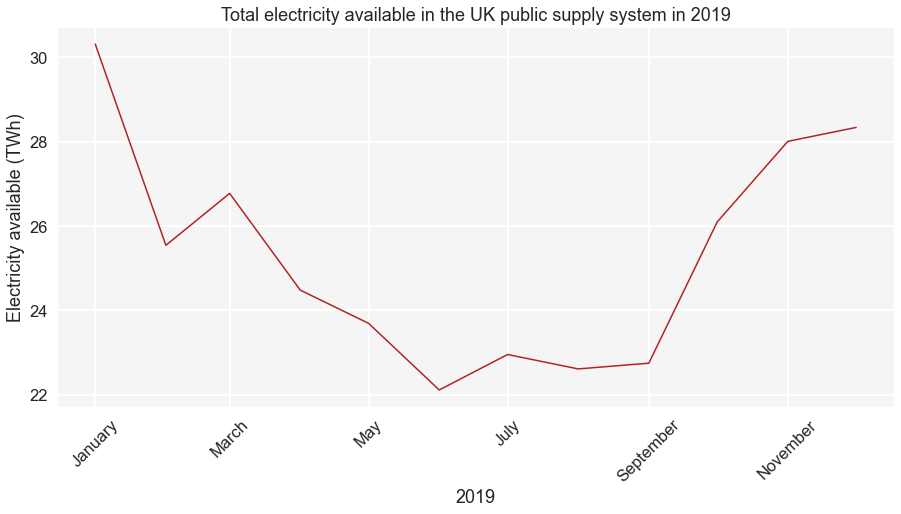

In [251]:
# Select data to plot.
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_plot_data = elec_avail.loc[(elec_avail['date'] >= start_date) & 
                                      (elec_avail['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             color='firebrick',
             data=elec_avail_plot_data).set(xlabel='2019',
                                            ylabel = 'Electricity available (TWh)',
                                            title='Total electricity available in the UK '
                                            'public supply system in 2019');

### 4.2 Electricity supply by type of fuel

In [268]:
# Recap dateframe headings.
variable_names = elec_avail_type.columns

for row in variable_names:
    print(row)

year
month
coal
oil
gas
nuclear
hydro
wind
solar
bioenergy
other
date


#### All available data

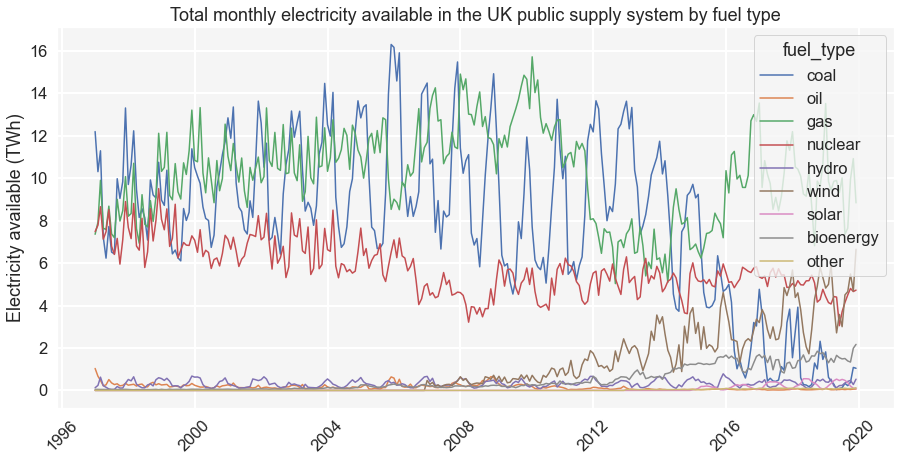

In [338]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type');

<-- Paragraph explaining results -->  
  
#### Last 10 years

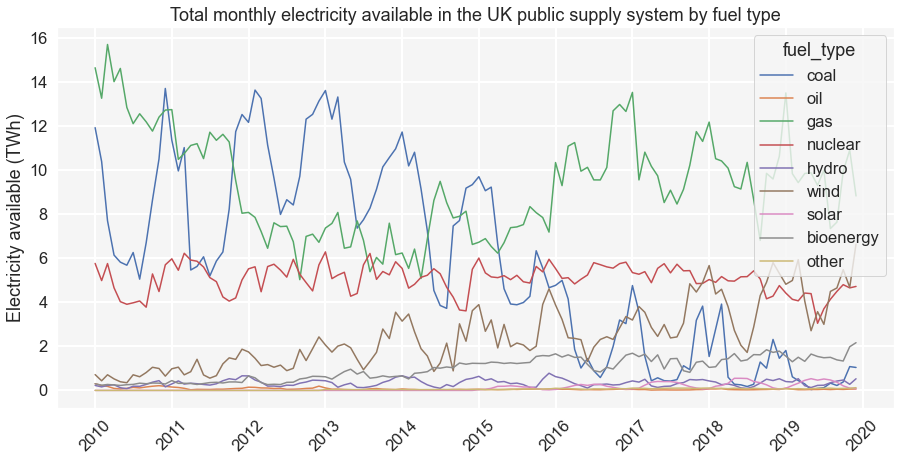

In [339]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type');

#### Last year

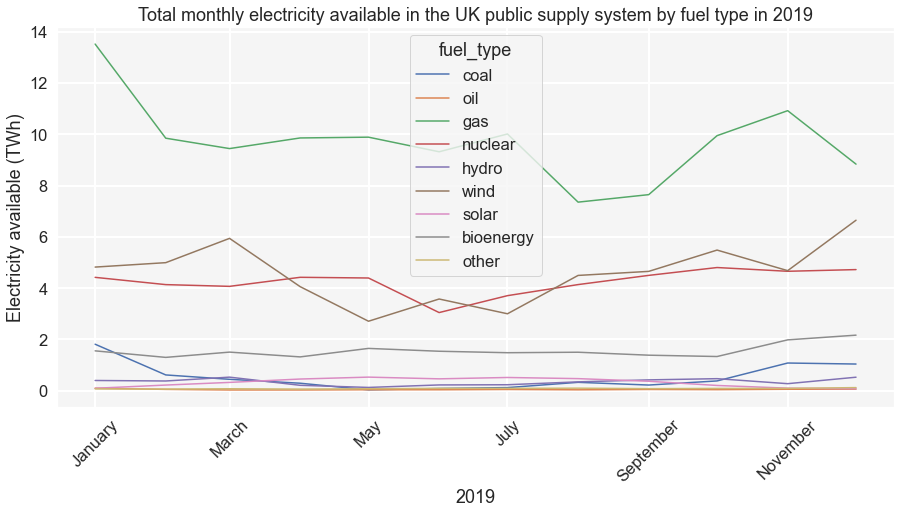

In [345]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_type_plot_data = elec_avail_type.loc[(elec_avail_type['date'] >= start_date) & 
                                                (elec_avail_type['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_plot_data).set(xlabel='2019',
                                                  ylabel = 'Electricity available (TWh)',
                                                  title='Total monthly electricity '
                                                  'available in the UK public supply '
                                                  'system by fuel type in 2019');

### 4.3  Electricity supply by type of fuel (renewable vs non-renewable)

In [349]:
# Recap dateframe headings.
variable_names = elec_avail_renew.columns

for row in variable_names:
    print(row)

date
fuel_type
electricity_available


#### All available data

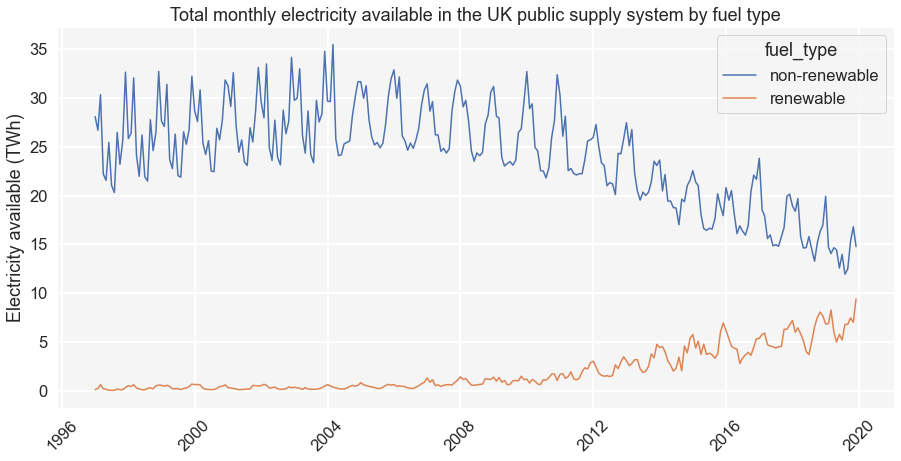

In [355]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type');

#### Last 10 years

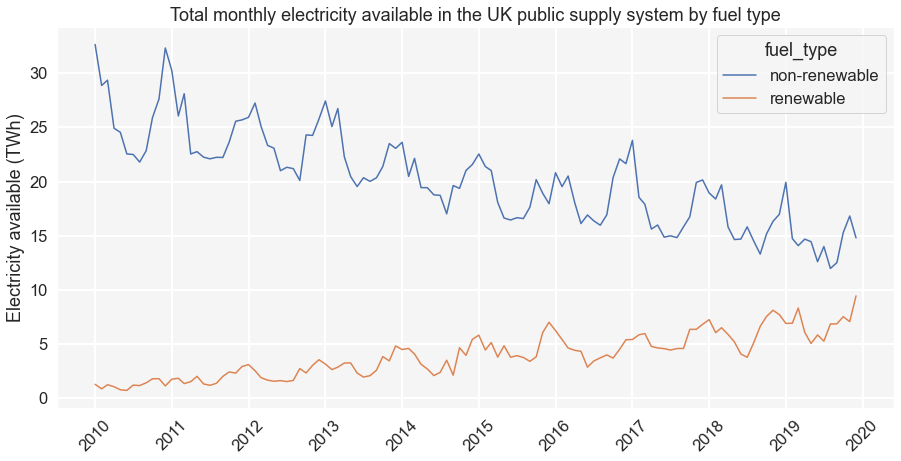

In [356]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type');

#### Last year

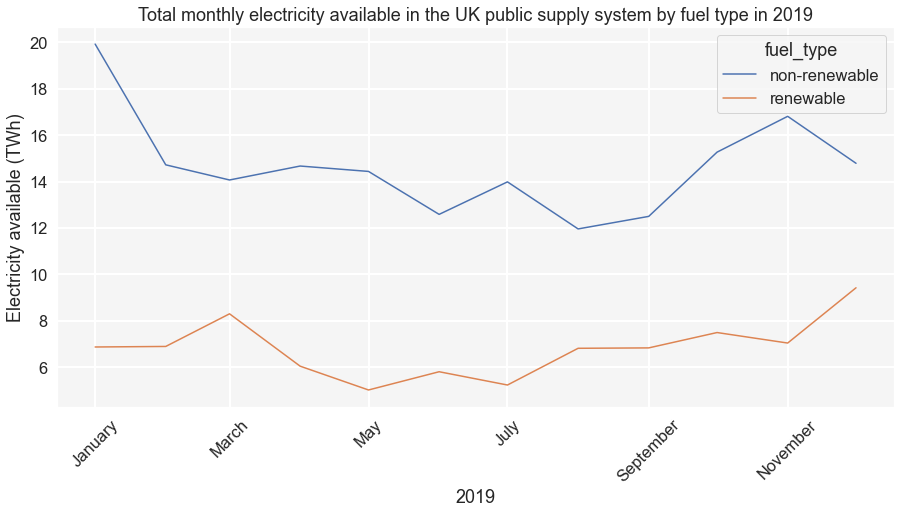

In [358]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_avail_type_renew_plot_data = elec_avail_renew.loc[(elec_avail_renew['date'] >= start_date) & 
                                                  (elec_avail_renew['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_available', 
             hue='fuel_type',
             data=elec_avail_type_renew_plot_data).set(xlabel='2019',
                                                       ylabel = 'Electricity available (TWh)',
                                                       title='Total monthly electricity '
                                                       'available in the UK public supply '
                                                       'system by fuel type in 2019');

### 4.4 Historic electricity demand

In [270]:
# Recap dateframe headings.
variable_names = elec_sold.columns

for row in variable_names:
    print(row)

year
month
electricity_sold_total
date


#### All available data

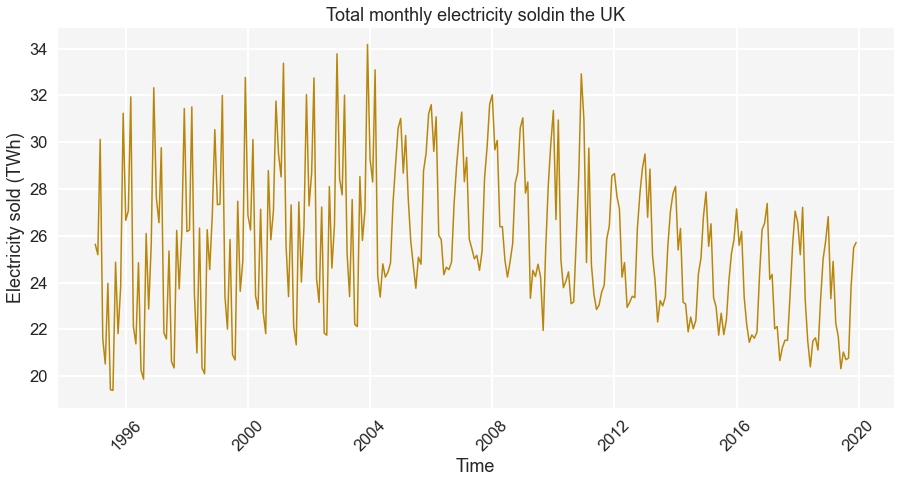

In [254]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '1995-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='Time',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total monthly electricity sold '
                                           'in the UK');

<-- Paragraph explaining plot -->  
  
#### Last 10 years

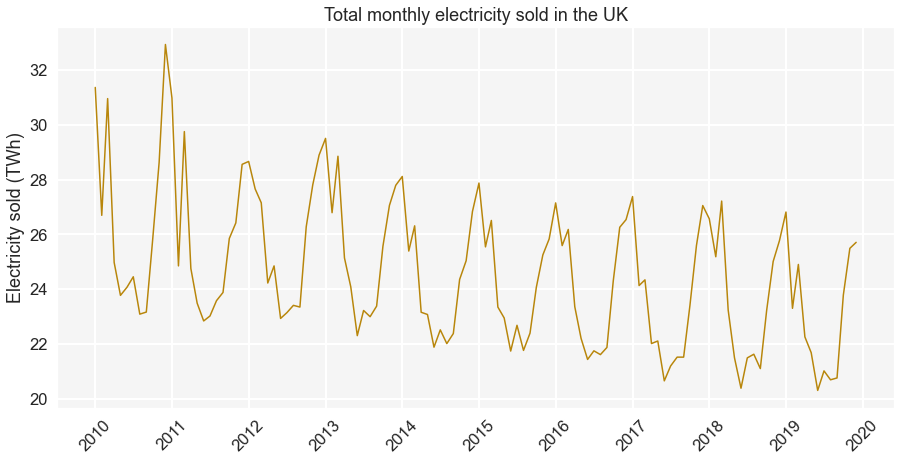

In [256]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2010-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total monthly electricity sold '
                                           'in the UK');

<-- Paragraph explaining plot -->  
  
#### Last year

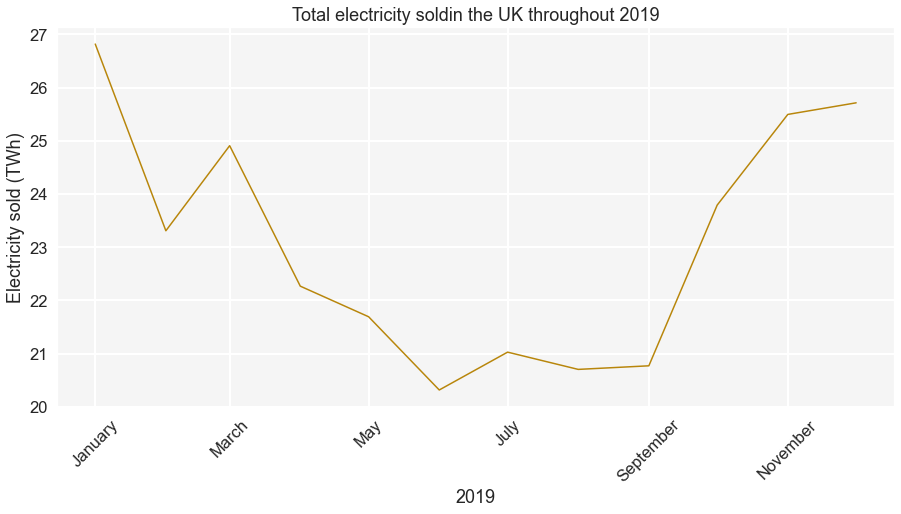

In [257]:
# Select data to plot (here we want to exclude 2020 data).
start_date = '2019-01-01'
end_date = '2019-12-31'

elec_sold_plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                                      (elec_sold['date'] <= end_date)]

# Set plot style.
sns.set_theme(style='darkgrid',
              context='notebook',
              font_scale = 1.5)
sns.set_style({'axes.facecolor': 'whitesmoke'})
sns.set_context({'grid.linewidth': 2})

# Plot axes.
fig, ax = plt.subplots(figsize=(15, 7))
ax.xaxis.set_major_formatter(DateFormatter('%B'))
plt.xticks(rotation=45)

# Plot data.
sns.lineplot(x='date', 
             y='electricity_sold_total', 
             color='darkgoldenrod',
             data=elec_sold_plot_data).set(xlabel='2019',
                                           ylabel = 'Electricity sold (TWh)',
                                           title='Total electricity sold '
                                           'in the UK throughout 2019');

## 5. The impact of COVID-19 on UK electricity supply and demand
  


### 5.1 COVID-19 movement restriction timeline

### 5.1 Change in the demand of electricity


<-- Paragraph : explain what the Oxford stringency index is a reference it. -->

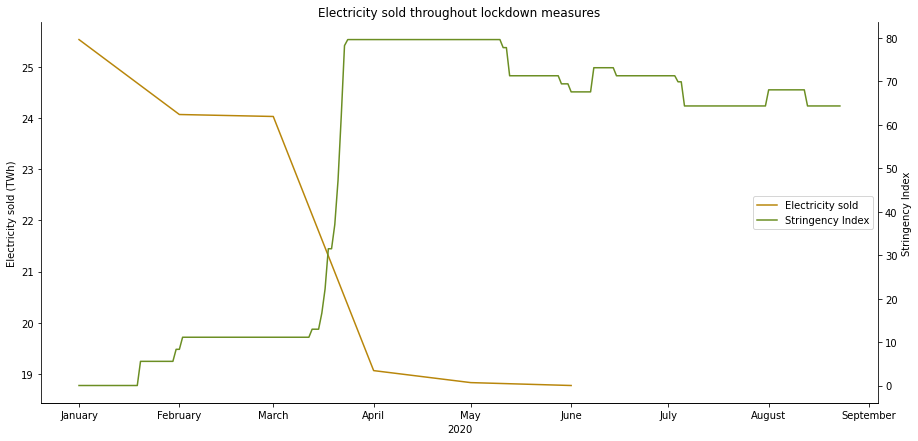

In [15]:
# Import response indices data.
response_indices = pd.read_excel('../data/response_indices.xlsx', sheet_name='UK_combined')

# Convert dates to datetime.
response_indices['date'] = pd.to_datetime(response_indices['date'].astype(str),
                                          format ='%Y%m%d')

# Select only the data we are interested in – the government response index (stringency).
stringency = response_indices[['date', 'stringency_index']]

# Check data is correct.
stringency


# Read in data.
elec_sold = pd.read_excel('../data/electricity_clean.xlsx', sheet_name='6.2')

# Create a datetime colum so it is easy to plot against time.
elec_sold['date'] = elec_sold['year'].astype(str) + '-' + elec_sold['month'].astype(str)
elec_sold['date'] = pd.to_datetime(elec_sold['date'],
                                       format='%Y-%B')

# Check data.
elec_sold

# Choose start and end dates.
start_date = '2020-01-01'
end_date = '2020-08-23'

# Get Python to select only the data you have asked for.
plot_data = elec_sold.loc[(elec_sold['date'] >= start_date) & 
                          (elec_sold['date'] <= end_date)]
string_plot = stringency.loc[(stringency['date'] >= start_date) & 
                             (stringency['date'] <= end_date)]

# Plot electricity.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_title('Electricity sold throughout lockdown measures')
ax1.set_xlabel('2020')
ax1.set_ylabel('Electricity sold (TWh)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

plt.plot(plot_data['date'],
         plot_data['electricity_sold_total'],
         color='darkgoldenrod',
         label='Electricity sold')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.plot(string_plot['date'], 
         string_plot['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='center right')

# Define the date format
date_form = DateFormatter("%B")
ax1.xaxis.set_major_formatter(date_form)

<-- Paragraph interpreting the data. Make sure to explain that the demand does always go down in summer anyway. -->

<-- Paragraph explaining that it might be better to look at higher resolution data. -->

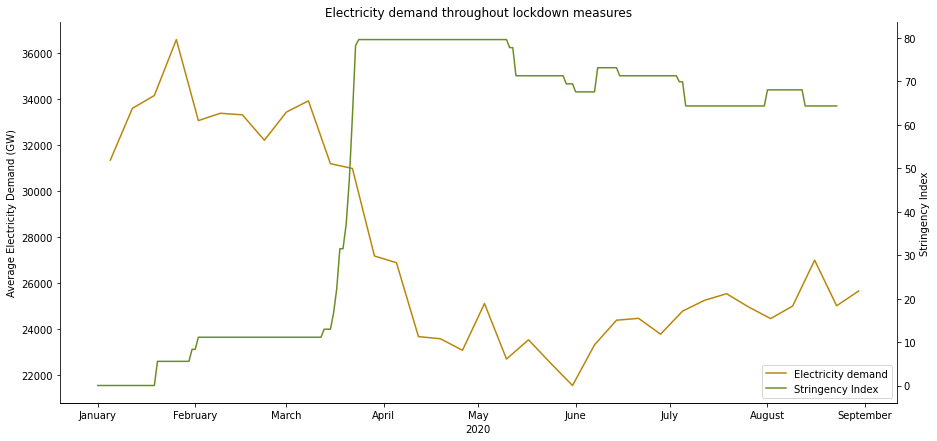

In [16]:
# Import csv file created in MySQL.
avg_weekly_demand = pd.read_csv('../data/avg_demand_wk.csv')

# Convert last date in the week to datetime.
avg_weekly_demand['last_date_of_week'] = pd.to_datetime(avg_weekly_demand['last_date_of_week'].astype(str),
                                                        format = '%Y-%m-%d')

# Plot demand.
fig, ax1 = plt.subplots(figsize=(15, 7))
ax1.set_xlabel('2020')
ax1.set_ylabel('Average Electricity Demand (GW)')
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.set_title('Electricity demand throughout lockdown measures')
plt.plot(avg_weekly_demand['last_date_of_week'],
         avg_weekly_demand['demand_GW'],
         color='darkgoldenrod',
         label='Electricity demand')

# Plot government response index.
ax2 = ax1.twinx()
ax2.set_ylabel('Stringency Index')
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)
plt.plot(stringency['date'], 
         stringency['stringency_index'], 
         color='olivedrab',
         label='Stringency Index')

# Plot legend.
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

leg = ax2.legend(lines + lines2, labels + labels2,
                 frameon=True,
                 loc='lower right')

# Define the date format
date_form = DateFormatter("%B")
ax1.xaxis.set_major_formatter(date_form)

## 6. What would have happened if COVID-19 had not happened?

Model prediciting how much electricity would have been sold throughout 2020 if COVID-19 hadn't happened.

## 7. Conclusion

## References

BEIS (2010) *Electricity Statistics – data sources and methodologies*, Department for Business, Energy & Industrial Strategy. Available online: https://www.gov.uk/government/publications/electricity-statistics-data-sources-and-methodologies [Accessed 2020-09-11].

BEIS (2020) *Energy Trends: UK Electricity*, Department for Business, Energy & Industrial Strategy. Available online: https://www.gov.uk/government/statistics/electricity-section-5-energy-trends [Downloaded 2020-09-12].

